# Random-Walk and Diffusion-based Methods

Although this book puts a heavy emphasis on spectral methods, there are many ways to learn lower-dimensional representations for networks which don't involve spectral clustering in any way. These methods might be more computationally efficient on large networks, or they might be more easily parallelizable; they might avoid problems like nonidentifiability, or they could provide representations which are better for the particular downstream machine learning task that you want to use the representation for. Maybe you want to cluster in a way that groups together different types of nodes than spectral methods. Regardless of your reasoning, this chapter is intended to give you a some insight into the world of alternative ways to represent networks.

## node2vec

node2vec is one such method. Instead of relying on taking eigenvectors or eigenvalues, like a Laplacian, node2vec uses a random walk to preserve the relationships between nodes and their *local neighborhoods*: all of the nodes which you can get to by walking along a small number of edges from your starting node. For example, take 

<AxesSubplot:>

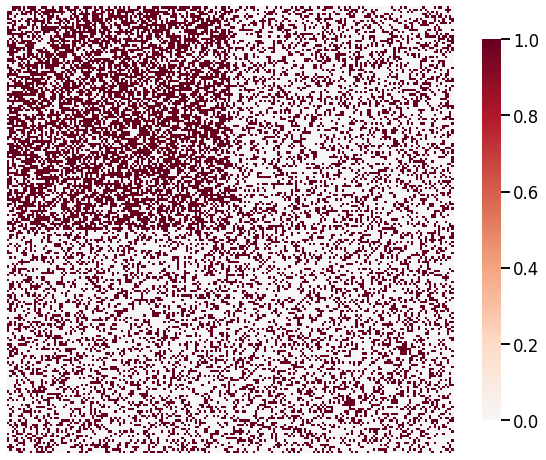

In [26]:
from graspologic.embed import node2vec_embed
from graspologic.simulations import sbm
from graspologic.plot import heatmap
import numpy as np
import networkx as nx

# Start with some simple parameters
N = 300  # Total number of nodes
n = N // 3  # Nodes per community
B = np.array([[.6, .3],
              [.3, .3]])  # Our block probability matrix

# Make our Stochastic Block Model
A, labels = sbm([n, n], B, return_labels = True)

heatmap(A)

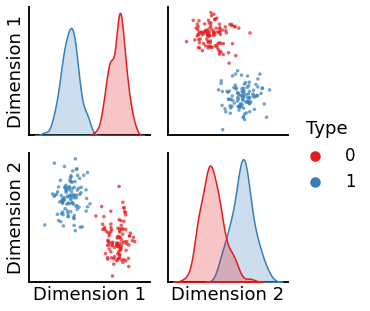

In [27]:
from graspologic.embed import AdjacencySpectralEmbed as ASE

ase = ASE(n_components=2)
latents = ase.fit_transform(A)

pairplot(latents, labels=labels)

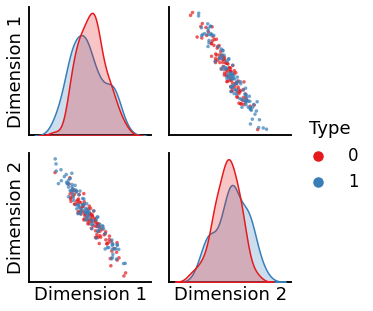

In [28]:
from graspologic.plot import pairplot

networkx_sbm = nx.Graph(A)
a, nodes = node2vec_embed(networkx_sbm, dimensions=2, walk_length=100)
pairplot(a, labels=labels)